In [8]:
%matplotlib inline

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from qreservoirpy import QReservoir, Layers, utilities
from qiskit.circuit.library.standard_gates import HGate, SGate, CXGate


In [10]:
n_qubits = 4
shots = 10000
circop = utilities.random_circuit(n_qubits, gates=[
    HGate, SGate, CXGate
], depth=20)
op = circop.to_gate(label='RES')
# circop.draw('mpl')


Simulating: 100%|██████████| 1/1 [00:06<00:00,  6.97s/it]


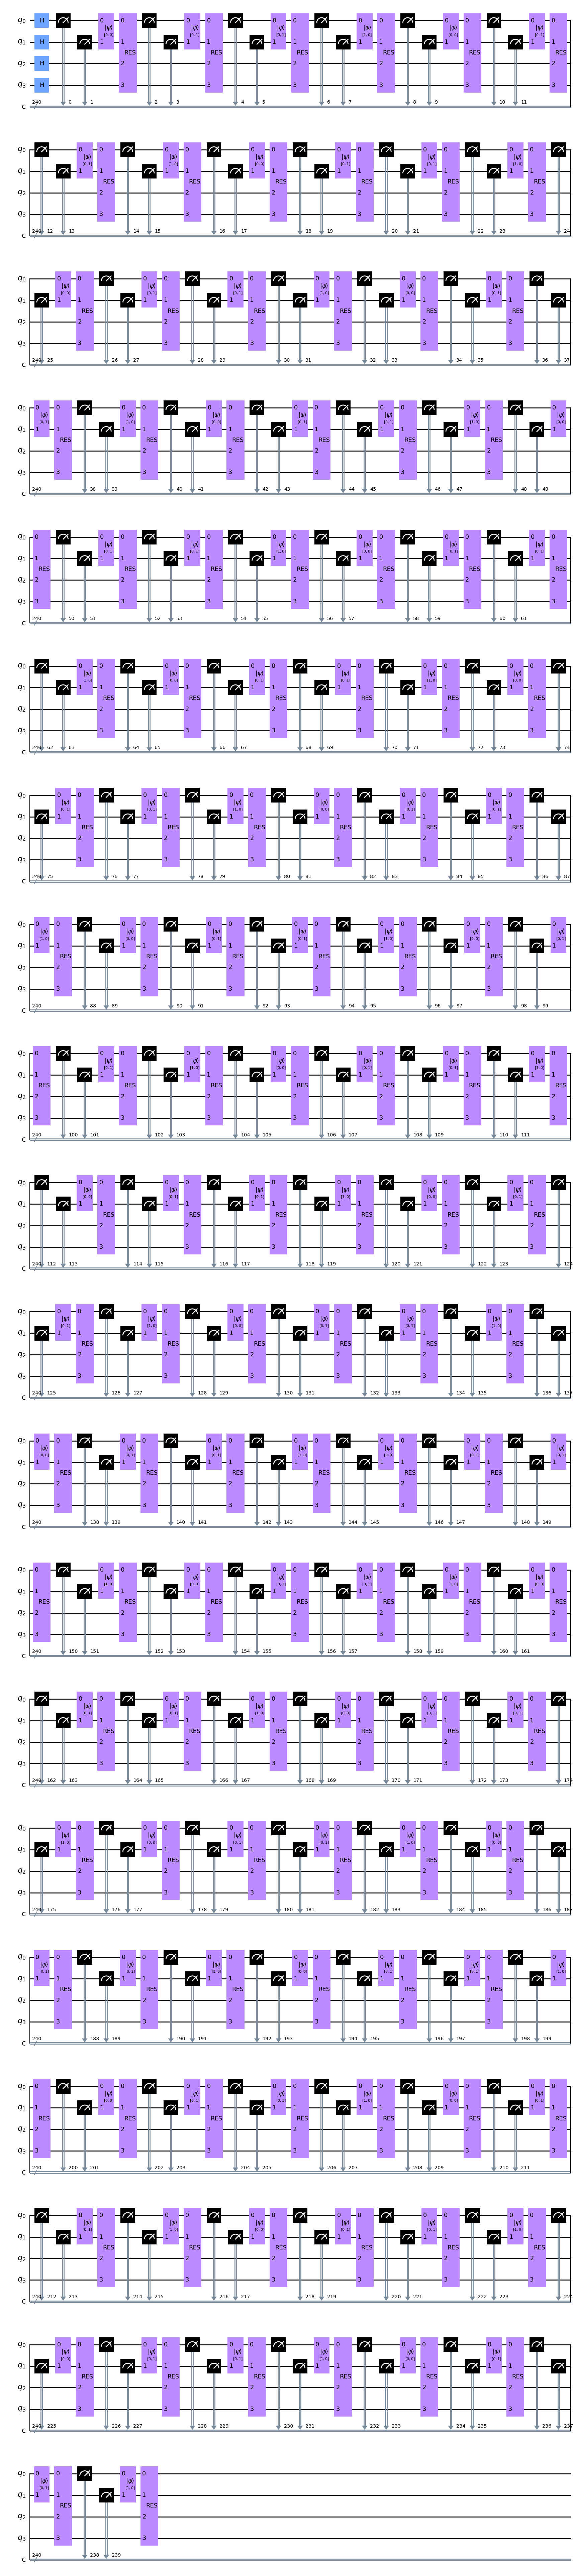

In [11]:
target = [0, 1, 1, 2] * 30
def build_method(circ, timestep, operator, encoder):
    for i in range(2):
        circ.measure(i)
    circ.initialize(encoder[timestep], [0, 1])
    circ.append(operator,circ.qubits)
    return circ

res = QReservoir(
    qubits=n_qubits, 
    layers=[
        Layers.H(),
        Layers.Timeseries(build_method=build_method),
    ], 
    operator=op, 
    encoder={
        0: '00',
        1: '01',
        2: '10',
        3: '11'
    })
states = res.run(target, shots=shots, transpile=True, simulator='aer_simulator_stabilizer', disable_status_bar=False)
res.circuit.draw('mpl')


(120, 2)


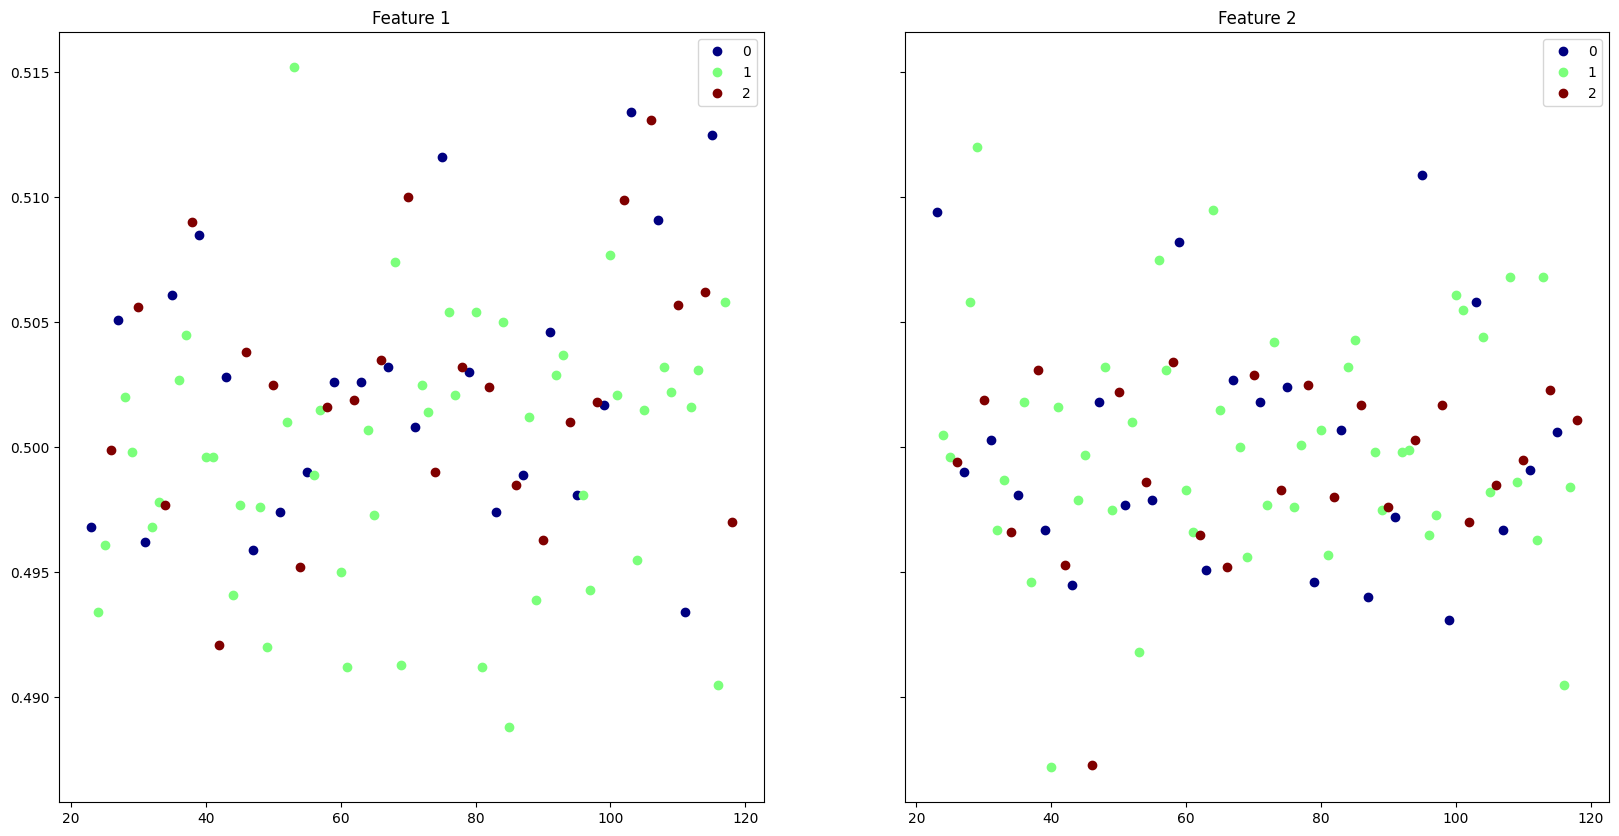

In [12]:
print(states.shape)
fig ,axes = utilities.result_plotter(states[:-1], target[1:], warmup=0.2)



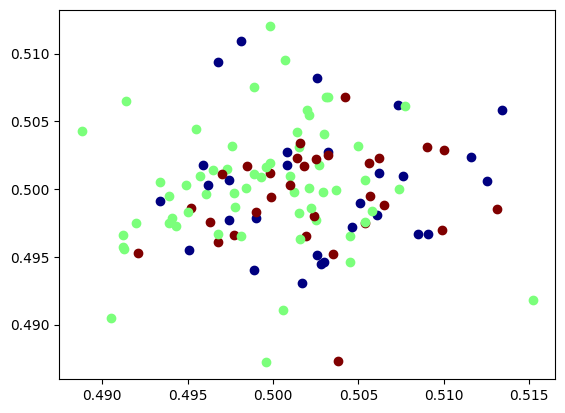

In [14]:
cmap = plt.get_cmap('jet', len(np.unique(target)))
for elem, x, y in zip(target[1:], states[:, 0][:-1], states[:, 1][:-1]):
    plt.scatter(x, y, color=cmap(elem))